In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
raw = pd.read_csv('서울특별시 부동산 실거래가 정보.csv')

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
print(raw.shape)
print(raw.columns)
raw.head(3)

(2077425, 19)
Index(['실거래가아이디', '지번코드', '시군구코드', '자치구명', '법정동코드', '법정동명', '신고년도', '업무구분코드',
       '업무구분', '신고일자', '물건번호', '대지권면적', '건물면적', '관리구분코드', '층정보', '건물주용도코드',
       '건물주용도', '물건금액', '건축년도'],
      dtype='object')


,실거래가아이디,지번코드,시군구코드,자치구명,법정동코드,법정동명,신고년도,업무구분코드,업무구분,신고일자,물건번호,대지권면적,건물면적,관리구분코드,층정보,건물주용도코드,건물주용도,물건금액,건축년도
0,11110-2019-4-0003026-1,1111017900101990000,11110,종로구,1.111018e+09,홍파동,2019,4,신고,NaN,1,0.0,84.93,0,5.0,2001,아파트,1505000000,2017.0
1,11110-2019-4-0003296-1,1111018000101260000,11110,종로구,1.111018e+09,교북동,2019,4,신고,NaN,1,0.0,45.88,0,8.0,2001,아파트,970000000,2017.0
2,11110-2019-4-0003311-1,1111017500100760000,11110,종로구,1.111018e+09,숭인동,2019,4,신고,NaN,1,0.0,84.95,0,20.0,2001,아파트,780000000,2004.0


In [11]:
raw['신고년도'].value_counts()

2015    212558
2006    210885
2016    209597
2017    187634
2018    165610
2007    146983
2008    146485
2014    142031
2009    139661
2019    122021
2011    112410
2013    107283
2010     92965
2012     81302
Name: 신고년도, dtype: int64

In [12]:
data = raw[['자치구명', '법정동명', '신고년도', '건물면적', '층정보', '건물주용도', '물건금액', '건축년도']]
print(data.shape)
print(data.columns)
data.head(3)

(2077425, 8)
Index(['자치구명', '법정동명', '신고년도', '건물면적', '층정보', '건물주용도', '물건금액', '건축년도'], dtype='object')


,자치구명,법정동명,신고년도,건물면적,층정보,건물주용도,물건금액,건축년도
0,종로구,홍파동,2019,84.93,5.0,아파트,1505000000,2017.0
1,종로구,교북동,2019,45.88,8.0,아파트,970000000,2017.0
2,종로구,숭인동,2019,84.95,20.0,아파트,780000000,2004.0


#### 자치구별 거래수

In [14]:
data['자치구명'].value_counts()

강서구     139922
노원구     138177
은평구     125795
송파구     122147
강남구     105342
양천구     100894
강동구      98186
성북구      96634
구로구      96390
마포구      89372
도봉구      86182
서초구      83171
관악구      83044
영등포구     82947
동작구      76928
서대문구     72111
동대문구     71986
중랑구      69985
강북구      67328
성동구      61582
광진구      58914
용산구      50080
금천구      42600
종로구      32649
중구       24862
Name: 자치구명, dtype: int64

#### 건물 용도를 아파트로 제한

In [15]:
data['건물주용도'].value_counts()

아파트     1135932
연립주택     605110
단독주택     179011
오피스텔     157372
Name: 건물주용도, dtype: int64

In [73]:
data_apartment = data.loc[data['건물주용도'] == '아파트']
data_apartment.shape

(1135932, 8)

In [27]:
pivot_price = pd.pivot_table(data_apartment, index = '자치구명', values = '물건금액', aggfunc = ['mean', 'count'])
pivot_price.head(3)

,mean,count
,물건금액,물건금액
자치구명,,
강남구,1.008316e+09,70955
강동구,4.861323e+08,64456
강북구,3.286371e+08,21583


In [30]:
pivot_price.columns

MultiIndex([( 'mean', '물건금액'),
            ('count', '물건금액')],
           )

#### 물건금액 순위

In [32]:
pivot_price.sort_values(by = ('mean', '물건금액'), ascending= False).head(5)

,mean,count
,물건금액,물건금액
자치구명,,
강남구,1.008316e+09,70955
서초구,9.910713e+08,53611
용산구,8.884442e+08,21346
송파구,7.383125e+08,76915
광진구,5.839795e+08,22696


#### 거래량 순위

In [33]:
pivot_price.sort_values(by = ('count', '물건금액'), ascending= False).head(5)

,mean,count
,물건금액,물건금액
자치구명,,
노원구,2.851016e+08,116726
송파구,7.383125e+08,76915
강남구,1.008316e+09,70955
강서구,3.765298e+08,65361
강동구,4.861323e+08,64456


In [38]:
pivot1.head(5)

물건금액
자치구명 신고년도              
강남구  2006  7.730797e+08
     2007  6.849909e+08
     2008  7.492315e+08
     2009  9.016936e+08
     2010  8.841698e+08

In [43]:
data['자치구명'].value_counts()

Index(['강서구', '노원구', '은평구', '송파구', '강남구', '양천구', '강동구', '성북구', '구로구', '마포구',
       '도봉구', '서초구', '관악구', '영등포구', '동작구', '서대문구', '동대문구', '중랑구', '강북구', '성동구',
       '광진구', '용산구', '금천구', '종로구', '중구'],
      dtype='object')

In [47]:
자치구명 = ['강서구', '노원구', '은평구', '송파구', '강남구', '양천구', '강동구', '성북구', '구로구', '마포구', 
          '도봉구', '서초구', '관악구', '영등포구', '동작구', '서대문구', '동대문구', '중랑구', '강북구', '성동구',
          '광진구', '용산구', '금천구', '종로구', '중구']

#### 연도별 자치구 평균 매매가

In [65]:
pivot2 = pd.pivot_table(data_apartment, index = '자치구명', columns = '신고년도', values = '물건금액', aggfunc = 'mean')
pivot2.head(2)

신고년도,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
자치구명,,,,,,,,,,,,,,
강남구,7.730797e+08,6.849909e+08,7.492315e+08,9.016936e+08,8.841698e+08,8.544607e+08,8.220726e+08,8.363523e+08,8.844518e+08,9.443296e+08,1.077285e+09,1.250087e+09,1.532446e+09,1.787674e+09
강동구,3.968166e+08,3.758434e+08,4.003060e+08,4.316093e+08,4.412606e+08,4.346527e+08,4.311924e+08,4.094944e+08,4.134590e+08,4.656392e+08,5.228612e+08,5.968459e+08,6.567978e+08,7.546413e+08


#### 2019년과 2006년의 평균 아파트 매매가의 차이와 증가율이 가장 큰 자치구는?

In [69]:
table1 = pivot2[[2006, 2019]]
table1.head(2)

신고년도,2006,2019
자치구명,,
강남구,7.730797e+08,1.787674e+09
강동구,3.968166e+08,7.546413e+08


In [77]:
# 차액 도출
table1['sub'] = table1[2019] - table1[2006]

# 증감율 도출
table1['rate'] = table1['sub'] / table1[2006]
table1.head(3)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


신고년도,2006,2019,sub,rate
자치구명,,,,
강남구,7.730797e+08,1.787674e+09,1.014595e+09,1.312406
강동구,3.968166e+08,7.546413e+08,3.578248e+08,0.901738
강북구,2.124996e+08,4.670717e+08,2.545720e+08,1.197988


In [78]:
# 증감율 순위 정렬
table1.sort_values(by = 'rate', ascending = False)

신고년도,2006,2019,sub,rate
자치구명,,,,
종로구,2.836965e+08,7.878218e+08,5.041253e+08,1.776988
용산구,5.638500e+08,1.548942e+09,9.850924e+08,1.747082
마포구,3.429519e+08,9.125884e+08,5.696365e+08,1.660981
서대문구,2.648670e+08,6.812379e+08,4.163709e+08,1.572000
성동구,3.828460e+08,9.574059e+08,5.745599e+08,1.500760
은평구,2.194621e+08,5.299285e+08,3.104665e+08,1.414670
강서구,2.496685e+08,5.886631e+08,3.389946e+08,1.357779
동작구,3.634209e+08,8.567303e+08,4.933094e+08,1.357405
노원구,1.864960e+08,4.357346e+08,2.492385e+08,1.336428


In [82]:
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['sans-serif']


#### 한글폰트 설치

In [83]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

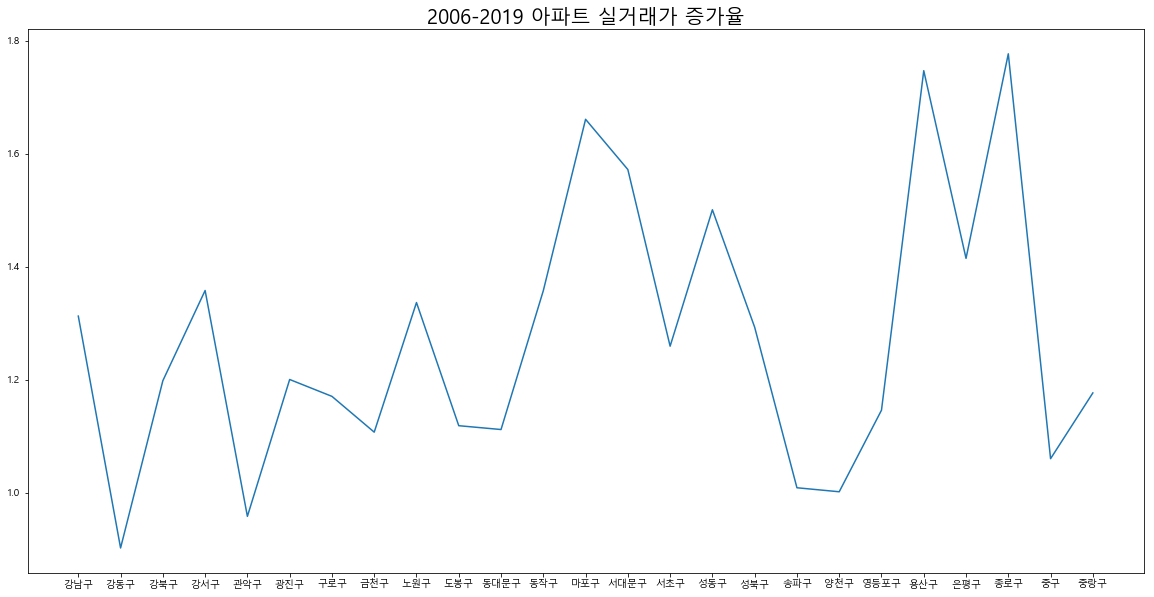

In [95]:
from matplotlib import figure

%matplotlib inline
plt.figure(figsize = (20, 10))
plt.title('2006-2019 아파트 실거래가 증가율', size = 20)
plt.plot(table1['rate'])

### 오피스텔의 증감율은?

In [96]:
data_office = data.loc[data['건물주용도'] == '오피스텔']
data_office.shape

(157372, 8)

In [97]:
data_office.head(3)

,자치구명,법정동명,신고년도,건물면적,층정보,건물주용도,물건금액,건축년도
5,종로구,내수동,2019,28.24,16.0,오피스텔,238000000,2004.0
14,종로구,수송동,2019,66.41,8.0,오피스텔,460000000,2004.0
15,종로구,숭인동,2019,39.60,23.0,오피스텔,265000000,2004.0


In [102]:
pivot2 = pd.pivot_table(data_office, index = '자치구명', columns = '신고년도', values = '물건금액')
table2 = pivot2[[2006, 2019]]
table2.head(3)

신고년도,2006,2019
자치구명,,
강남구,1.777927e+08,3.419283e+08
강동구,8.528588e+07,1.870784e+08
강북구,9.396062e+07,1.292485e+08


In [103]:
# 차액 도출
table2['sub'] = table2[2019] - table2[2006]

# 증감율 도출
table2['rate'] = table2['sub'] / table2[2006]
table2.head(3)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


신고년도,2006,2019,sub,rate
자치구명,,,,
강남구,1.777927e+08,3.419283e+08,1.641356e+08,0.923185
강동구,8.528588e+07,1.870784e+08,1.017926e+08,1.193545
강북구,9.396062e+07,1.292485e+08,3.528792e+07,0.375561


In [105]:
table2.sort_values(by = 'rate', ascending = False).head(5)

신고년도,2006,2019,sub,rate
자치구명,,,,
동작구,5.533333e+07,2.551923e+08,1.998590e+08,3.611909
은평구,5.987465e+07,1.677087e+08,1.078341e+08,1.800997
용산구,1.198340e+08,3.264757e+08,2.066417e+08,1.724399
관악구,6.658602e+07,1.760261e+08,1.094401e+08,1.643590
광진구,8.993224e+07,2.254203e+08,1.354881e+08,1.506557


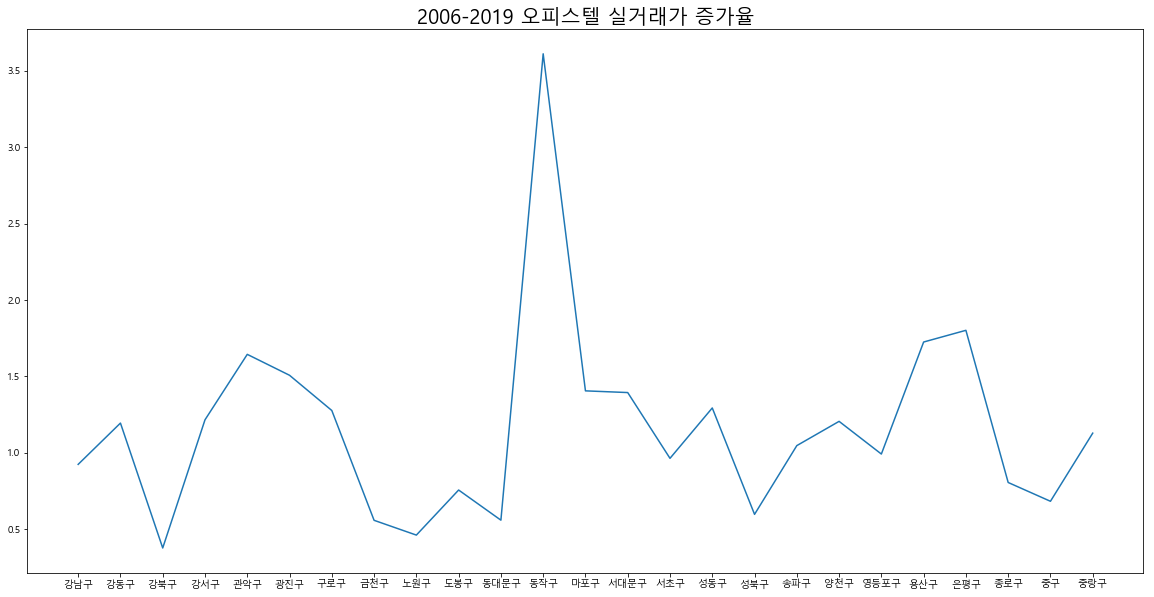

In [131]:
%matplotlib inline
plt.figure(figsize = (20, 10))
plt.title('2006-2019 오피스텔 실거래가 증가율', size = 20)
plt.plot(table2['rate'])

In [108]:
data_office.head(3)

,자치구명,법정동명,신고년도,건물면적,층정보,건물주용도,물건금액,건축년도
5,종로구,내수동,2019,28.24,16.0,오피스텔,238000000,2004.0
14,종로구,수송동,2019,66.41,8.0,오피스텔,460000000,2004.0
15,종로구,숭인동,2019,39.60,23.0,오피스텔,265000000,2004.0


#### 동작구 오피스텔 최고가와 최저가는?

In [112]:
table_dongjak_office = data_office.loc[data_office['자치구명'] == '동작구']
table_dongjak_office.head()

,자치구명,법정동명,신고년도,건물면적,층정보,건물주용도,물건금액,건축년도
10945,동작구,신대방동,2019,40.17,14.0,오피스텔,238000000,2006.0
23095,동작구,신대방동,2019,38.07,15.0,오피스텔,235000000,2006.0
35779,동작구,노량진동,2019,19.28,9.0,오피스텔,185000000,2015.0
35846,동작구,신대방동,2019,65.53,9.0,오피스텔,350000000,2006.0
42460,동작구,대방동,2017,27.50,4.0,오피스텔,106500000,2003.0


In [116]:
table_dongjak_office['물건금액'].describe()

count    1.492000e+03
mean     1.911596e+08
std      8.288245e+07
min      5.000000e+07
25%      1.360000e+08
50%      1.700000e+08
75%      2.400000e+08
max      5.950000e+08
Name: 물건금액, dtype: float64

In [118]:
table_dongjak_office.sort_values(by = '물건금액', ascending = False).head(3)

,자치구명,법정동명,신고년도,건물면적,층정보,건물주용도,물건금액,건축년도
1586989,동작구,신대방동,2018,84.98,11.0,오피스텔,595000000,2006.0
1544576,동작구,신대방동,2011,84.98,12.0,오피스텔,490000000,2006.0
2058015,동작구,신대방동,2019,90.63,15.0,오피스텔,420000000,2006.0


### 당산 부동산 거래정보

In [119]:
data_dangsan = data.loc[data['법정동명'] == '당산동']

In [122]:
print(data_dangsan.shape)
data_dangsan.head(3)

(2002, 8)


,자치구명,법정동명,신고년도,건물면적,층정보,건물주용도,물건금액,건축년도
2231,영등포구,당산동,2019,58.64,5.0,오피스텔,320000000,NaN
3602,영등포구,당산동,2019,42.25,2.0,오피스텔,253000000,2012.0
21351,영등포구,당산동,2019,79.43,16.0,아파트,875000000,2002.0


In [124]:
dangsan_apart = data_dangsan.loc[data_dangsan['건물주용도'] == '아파트']
dangsan_office = data_dangsan.loc[data_dangsan['건물주용도'] == '오피스텔']

print(dangsan_apart.shape)
print(dangsan_office.shape)

(1367, 8)
(453, 8)


In [126]:
dangsan_apart.sort_values(by = '물건금액', ascending = False).head(3)

,자치구명,법정동명,신고년도,건물면적,층정보,건물주용도,물건금액,건축년도
77771,영등포구,당산동,2019,108.15,6.0,아파트,1125000000,2002.0
2076757,영등포구,당산동,2019,108.15,15.0,아파트,1074000000,2002.0
71361,영등포구,당산동,2019,108.15,5.0,아파트,990000000,2002.0


In [127]:
dangsan_office.sort_values(by = '물건금액', ascending = False).head(3)

,자치구명,법정동명,신고년도,건물면적,층정보,건물주용도,물건금액,건축년도
40926,영등포구,당산동,2019,58.64,5.0,오피스텔,338000000,NaN
1517444,영등포구,당산동,2019,58.92,5.0,오피스텔,335000000,NaN
2231,영등포구,당산동,2019,58.64,5.0,오피스텔,320000000,NaN


#### 당산동 오피스텔 가격 증가율은?

In [129]:
pd.pivot_table(dangsan_office, index = '신고년도', values = '물건금액')

,물건금액
신고년도,
2006,3.100000e+07
2007,5.076120e+07
2008,5.225000e+07
2009,5.253125e+07
2010,8.782000e+07
2011,7.142857e+07
2012,1.138095e+08
2013,8.132182e+07
2014,8.016667e+07


### 자치구별 아파트 거래가 boxplot

In [133]:
data_apartment.head(3)

,자치구명,법정동명,신고년도,건물면적,층정보,건물주용도,물건금액,건축년도
0,종로구,홍파동,2019,84.93,5.0,아파트,1505000000,2017.0
1,종로구,교북동,2019,45.88,8.0,아파트,970000000,2017.0
2,종로구,숭인동,2019,84.95,20.0,아파트,780000000,2004.0


,물건금액
자치구명,
강남구,1.008316e+09
강동구,4.861323e+08
강북구,3.286371e+08
강서구,3.765298e+08
관악구,3.652146e+08
광진구,5.839795e+08
구로구,3.345102e+08
금천구,2.980384e+08
노원구,2.851016e+08


In [ ]:
%matplotlib inline
plt.figure(figsize = (20, 10))
plt.title('2006-2019 오피스텔 실거래가 증가율', size = 20)
plt.boxplot(table2['rate'])

#### 같은 건물을 가지고 실거래가를 판단해야 하지 않을까?
#### 또는 지가로?